In [1]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
#line domain
xmin = 0.0
xmax = np.pi
nx = 64
dx = (xmax-xmin)/nx

#time interval
tmin = 0.0
tmax = 1.0
nt = 1024
dt = (tmax-tmin)/nt

c = 1.0 #spreading coefficient

rsq = c*dt/(dx**2) #constant
print(nx,nt,rsq)
M = 21 #maximam fourier number
#63 1252 0.3999999999999999

64 1024 0.4052847345693511


In [3]:
#initialize
F = np.zeros(nx)
F_M = [np.zeros(nx) for m in range(M)]

In [4]:
#Fourier coefficients
A = [0]*M


T = np.linspace(tmin, tmax, nt, endpoint = False)
X = np.linspace(0, np.pi, nx, endpoint = False)+dx/2
F = np.cos(4*X)
for i in range(nx//2):
    F[i] = 1
#F = np.sin(X)

for m in range(M):
    A[m] = (np.dot(np.cos(m*X),F))/nx
for i in range(len(A)): print(format(A[i], '.4f'))

0.5000
0.3395
-0.0000
-0.2425
0.2500
-0.1132
-0.0000
0.0220
-0.0000
-0.0087
-0.0000
0.0044
-0.0000
-0.0026
-0.0000
0.0016
-0.0000
-0.0011
0.0000
0.0008
-0.0000


In [5]:
F_M[0] = np.cos(0*X)*A[0]
#dist2 = [np.sqrt(np.dot(F-F_M[0],F-F_M[0])/nx)]
#distinf = [max(abs(F-F_M[0]))]
#dist1 = [sum(abs(F-F_M[0]))/nx]
for m in range(1,M):
    F_M[m]=2*np.cos(m*X)*A[m]
#   dist2+=[np.sqrt(np.dot(F-F_M[m],F-F_M[m])/nx)]
#   distinf+= [max(abs(F-F_M[m]))]
#   dist1+= [sum(abs(F-F_M[m]))/nx]

In [6]:
u = [[[0 for x in range(nx)] for m in range(M)] for t in range(nt)]  #u[t][m][x]

u[0]= F_M
F_M

[array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 array([ 0.67885635,  0.67722093,  0.67395402,  0.6690635 ,  0.66256114,
         0.65446262,  0.64478744,  0.63355891,  0.62080408,  0.60655368,
         0.59084203,  0.573707  ,  0.55518986,  0.53533521,  0.5141909 ,
         0.49180786,  0.46824001,  0.44354412,  0.4177797 ,  0.39100881,
         0.36329595,  0.33470788,  0.30531346,  0.27518352,  0.24439064,
         0.213009  ,  0.1811142 ,  0.14878308,  0.11609353,  0.0831243 ,
         0.04995482,  0.01666499, -0.01666499, -0.04995482, -0.0831243 ,
        -0.11609353, -0.14878308, -0.1811142 , -0.213009  , -0.24439064,
        -0.27518352, -0.30531346, -0.33470788, -0.3632

In [7]:
for m in range(M):
    for t in range(nt):
        u[t][m] = np.dot(np.exp(-t*dt*m),u[0][m])#離散化状態

In [8]:
for m in range(1,M):
    for t in range(nt):
        u[t][m] += u[t][m-1]

In [9]:

#solution
v = np.zeros((nt,nx))

#initial data
v[0] = F
print(len(F))

#simulation
for t in range(nt-1):
    for x in range(1,nx-1):
        v[t+1,x] = (1-2*rsq)*v[t,x]+rsq*(v[t,x-1]+v[t,x+1])
    #Neumann condition
    v[t+1,0] = v[t+1,1]
    v[t+1,nx-1] = v[t+1,nx-2]


64


In [10]:
i = M-1
dist2 = [np.sqrt(np.dot(u[0][i]-v[0],u[0][i]-v[0])/nx)]
#distinf = [max(abs(F-F_M[0]))]
#dist1 = [sum(abs(F-F_M[0]))/nx]
total_f = [sum(u[0][i])/nx]
total_i = [sum(v[0])/nx]
for t in range(1,nt):
    dist2+=[np.sqrt(np.dot(u[t][i]-v[t],u[t][i]-v[t])/nx)]
#   distinf+= [max(abs(F-F_M[m]))]
#   dist1+= [sum(abs(F-F_M[m]))/nx]
    total_f += [sum(u[t][i])/nx]
    total_i += [sum(v[t])/nx]

<IPython.core.display.Javascript object>


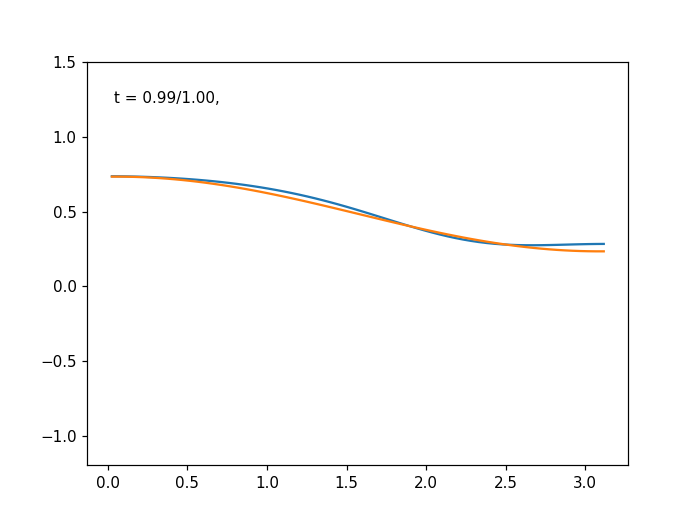

In [17]:
fig1 = plt.figure()
fig1.set_dpi(100)
ax = fig1.add_subplot(1,1,1)
def animate(t):
    ax.clear()
    plt.ylim([-1.2,1.5])
    
    p, = plt.plot(X,u[10*t][M-1])
    p, = plt.plot(X,v[10*t])
    time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
    time_text2 = ax.text(0.05, 0.85,'', transform=ax.transAxes)
    time_text.set_text('t = %.2f/%.2f,' 
                       % ((10*t+1)/nt,tmax))
#    time_text2.set_text('L^infty distance = %.3f, L^1 distance = %.3f, ' 
#                       % (total_f[t],total_i[t]))
    if t==nt//10-1:
        plt.savefig('question_W_fourier_COMP.png')
    
anim = animation.FuncAnimation(fig1,animate,frames=nt//10,interval=60,repeat=False)
anim.save("question_W_fourier_COMP.gif", writer="imagemagick")
plt.show()

<IPython.core.display.Javascript object>


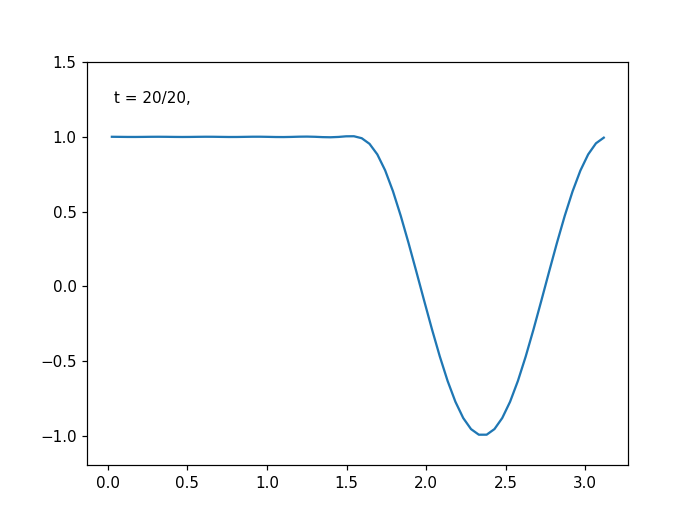

In [13]:
fig1 = plt.figure()
fig1.set_dpi(100)
ax = fig1.add_subplot(1,1,1)
def animate(t):
    ax.clear()
    plt.ylim([-1.2,1.5])
    
    p, = plt.plot(X,F_M[t])
#    p, = plt.plot(X,v[t])
    time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
    time_text2 = ax.text(0.05, 0.85,'', transform=ax.transAxes)
    time_text.set_text('t = %.2d/%.2d,' 
                       % (t,M-1))
#    time_text2.set_text('L^infty distance = %.3f, L^1 distance = %.3f, ' 
#                       % (total_f[t],total_i[t]))
#    if i==8:
#        plt.savefig('W_fourier_exp.png')
    
anim = animation.FuncAnimation(fig1,animate,frames=M,interval=600,repeat=False)
anim.save("question_W_fourier_TRANS.gif", writer="imagemagick")
plt.show()